In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn_extra.cluster import KMedoids  # PAM


import warnings

warnings.filterwarnings("ignore")

encoder = OrdinalEncoder()
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sns.set_palette("pastel")
plt.rcParams["figure.figsize"] = [15, 7]

In [115]:
aa = pd.DataFrame([[1,1,1], [2,1,3]])
aa

0  1  2
0  1  1  1
1  2  1  3

0

In [117]:
cc

1

In [120]:
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = data.drop(columns="customerID")
data.drop_duplicates(inplace=True)
data.drop("TotalCharges", axis=1, inplace=True)
nominal_features = ("PaperlessBilling", "Dependents", "Partner", "Churn")
for feature in nominal_features:
    data[feature] = data[feature].map({"Yes": 1, "No": 0})

data = pd.get_dummies(
    data,
    columns=[
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaymentMethod",
    ],
)

# No internet service column has the same values (we checked it before) for OnlineSecurity, OnlineBackup, DeviceProtection,
# TechSupport, StreamingTV and StreamingMovies

data.drop(
    columns=[
        "OnlineSecurity_No internet service",
        "OnlineBackup_No internet service",
        "DeviceProtection_No internet service",
        "TechSupport_No internet service",
        "StreamingTV_No internet service",
        "StreamingMovies_No internet service",
    ],
    inplace=True,
)
    
df_cluster = data.copy()
scaler = StandardScaler()
df_cluster[["tenure", "MonthlyCharges"]] = scaler.fit_transform(
    df_cluster[["tenure", "MonthlyCharges"]]
)

df_cluster[
    df_cluster.columns[~df_cluster.columns.isin(["tenure", "MonthlyCharges"])]
] = encoder.fit_transform(
    df_cluster[
        df_cluster.columns[~df_cluster.columns.isin(["tenure", "MonthlyCharges"])]
    ]
)
# take data without churn columns:
y = data.Churn
df_cluster.drop(columns='Churn', inplace=True)
data.drop(columns='Churn', inplace=True)


In [123]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7021, dtype: int64

In [124]:
data

gender  SeniorCitizen  Partner  Dependents  tenure PhoneService  \
0     Female              0        1           0       1           No   
1       Male              0        0           0      34          Yes   
2       Male              0        0           0       2          Yes   
3       Male              0        0           0      45           No   
4     Female              0        0           0       2          Yes   
...      ...            ...      ...         ...     ...          ...   
7038    Male              0        1           1      24          Yes   
7039  Female              0        1           1      72          Yes   
7040  Female              0        1           1      11           No   
7041    Male              1        1           0       4          Yes   
7042    Male              0        0           0      66          Yes   

         MultipleLines  PaperlessBilling  MonthlyCharges  InternetService_DSL  \
0     No phone service                 1           29.85                    1   
1                   No                 0           56.95                    1   
2                   No                 1           53.85                    1   
3     No phone service                 0           42.30                    1   
4                   No                 1           70.70                    0   
...                ...               ...             ...                  ...   
7038               Yes                 1           84.80                    1   
7039               Yes                 1          103.20                    0   
7040  No phone service                 1           29.60                    1   
7041               Yes                 1           74.40                    0   
7042                No                 1          105.65                    0   

      ...  StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  \
0     ...                0                   1                    0   
1     ...                0                   1                    0   
2     ...                0                   1                    0   
3     ...                0                   1                    0   
4     ...                0                   1                    0   
...   ...              ...                 ...                  ...   
7038  ...                1                   0                    1   
7039  ...                1                   0                    1   
7040  ...                0                   1                    0   
7041  ...                0                   1                    0   
7042  ...                1                   0                    1   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7038                        0                  1                  0   
7039                        0                  1                  0   
7040                        1                  0                  0   
7041                        1                  0                  0   
7042                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                                        0   
7040     

In [125]:
df_cluster

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        0.0            0.0      1.0         0.0 -1.282728           0.0   
1        1.0            0.0      0.0         0.0  0.062387           1.0   
2        1.0            0.0      0.0         0.0 -1.241967           1.0   
3        1.0            0.0      0.0         0.0  0.510759           0.0   
4        0.0            0.0      0.0         0.0 -1.241967           1.0   
...      ...            ...      ...         ...       ...           ...   
7038     1.0            0.0      1.0         1.0 -0.345224           1.0   
7039     0.0            0.0      1.0         1.0  1.611307           1.0   
7040     0.0            0.0      1.0         1.0 -0.875118           0.0   
7041     1.0            1.0      1.0         0.0 -1.160445           1.0   
7042     1.0            0.0      0.0         0.0  1.366741           1.0   

      MultipleLines  PaperlessBilling  MonthlyCharges  InternetService_DSL  \
0               1.0               1.0       -1.164135                  1.0   
1               0.0               0.0       -0.262811                  1.0   
2               0.0               1.0       -0.365914                  1.0   
3               1.0               0.0       -0.750058                  1.0   
4               0.0               1.0        0.194503                  0.0   
...             ...               ...             ...                  ...   
7038            2.0               1.0        0.663458                  1.0   
7039            2.0               1.0        1.275428                  0.0   
7040            1.0               1.0       -1.172450                  1.0   
7041            2.0               1.0        0.317562                  0.0   
7042            0.0               1.0        1.356913                  0.0   

      ...  StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  \
0     ...              0.0                 1.0                  0.0   
1     ...              0.0                 1.0                  0.0   
2     ...              0.0                 1.0                  0.0   
3     ...              0.0                 1.0                  0.0   
4     ...              0.0                 1.0                  0.0   
...   ...              ...                 ...                  ...   
7038  ...              1.0                 0.0                  1.0   
7039  ...              1.0                 0.0                  1.0   
7040  ...              0.0                 1.0                  0.0   
7041  ...              0.0                 1.0                  0.0   
7042  ...              1.0                 0.0                  1.0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                         1.0                0.0                0.0   
1                         0.0                1.0                0.0   
2                         1.0                0.0                0.0   
3                         0.0                1.0                0.0   
4                         1.0                0.0                0.0   
...                       ...                ...                ...   
7038                      0.0                1.0                0.0   
7039                      0.0                1.0                0.0   
7040                      1.0                0.0                0.0   
7041                      1.0                0.0                0.0   
7042                      0.0                0.0                1.0   

      PaymentMethod_Bank transfer (automatic)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   
...                                       ...   
7038                                      0.0   
7039                                      0.0   
7040     

# Dimension Reduction

## MDS

In [82]:
from sklearn.manifold import MDS
import gower

In [84]:
Gower = gower.gower_matrix(data)

1
2
3
4
5
6
7
8
9
10


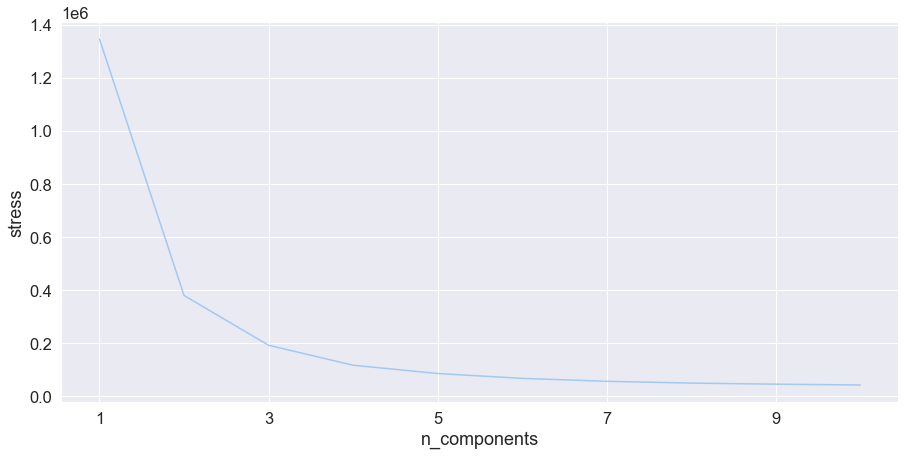

In [88]:
stress = []
# Max value for n_components
max_range = 11
for dim in range(1, max_range):
    print(dim)
    # Set up the MDS object
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    # Apply MDS
    pts = mds.fit_transform(Gower)
    # Retrieve the stress value
    stress.append(mds.stress_)
# Plot stress vs. n_components    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

In [90]:
mds_transform = MDS(n_components=4, dissimilarity='precomputed')
mds = mds_transform.fit_transform(Gower)

In [91]:
mds.shape

(7021, 4)

In [92]:
pd.DataFrame(mds).to_csv('mds.csv')

## PCA

We would like to cover 90% of original variance

In [12]:
from sklearn.decomposition import PCA

In [27]:
pca_transform = PCA()
pca = pca_transform.fit_transform(df_cluster)


In [28]:
pca

array([[-1.47166406e+00, -9.98167287e-01, -7.83893933e-01, ...,
        -4.48116871e-16, -2.81884704e-15,  1.80631536e-16],
       [-8.05047452e-01,  3.04437254e-01,  7.30326565e-01, ...,
         1.20440132e-15, -1.55302322e-15, -8.80290098e-16],
       [-1.47755713e+00, -1.01624768e+00,  4.38330704e-01, ...,
        -3.09112231e-16, -1.70071462e-15, -2.68843252e-16],
       ...,
       [-1.41322364e+00, -5.96695171e-01, -7.35402198e-01, ...,
        -4.34174979e-17, -1.26221710e-16, -3.10789048e-18],
       [-5.33959952e-02, -2.00438597e+00, -1.31139155e+00, ...,
         6.10092720e-17, -2.94717191e-17,  1.45083583e-16],
       [ 1.70284291e+00,  8.66378728e-01,  1.88706745e+00, ...,
        -1.62566556e-16, -3.68055309e-17, -6.50850748e-17]])

In [24]:
pd.DataFrame(pca).to_csv('pca.csv')

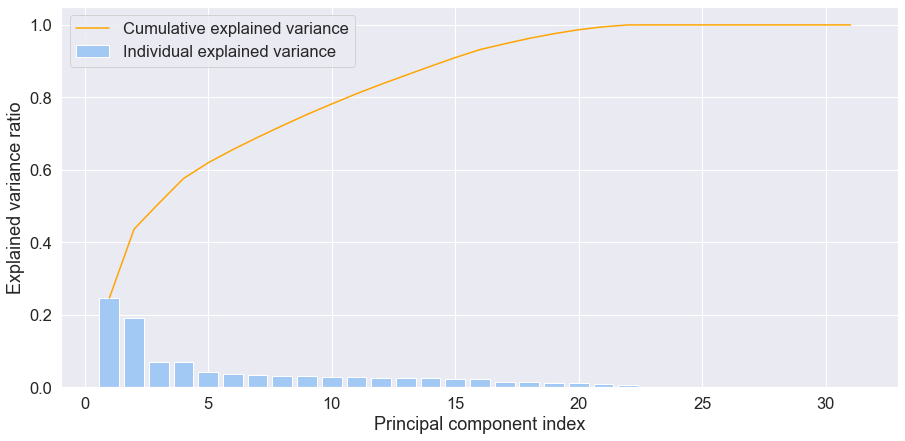

In [47]:
exp_var_pca = pca_transform.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, align='center', label='Individual explained variance')
plt.plot(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, label='Cumulative explained variance', color='orange')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend()
plt.show()

In [45]:
cum_sum_eigenvalues[10]   # 11th > 80

0.8099435055299056

In [60]:
pca = pca[:, :10]
pca.shape

(7021, 10)

## Clusterization after dimension reduction

### Metoda Silhouette


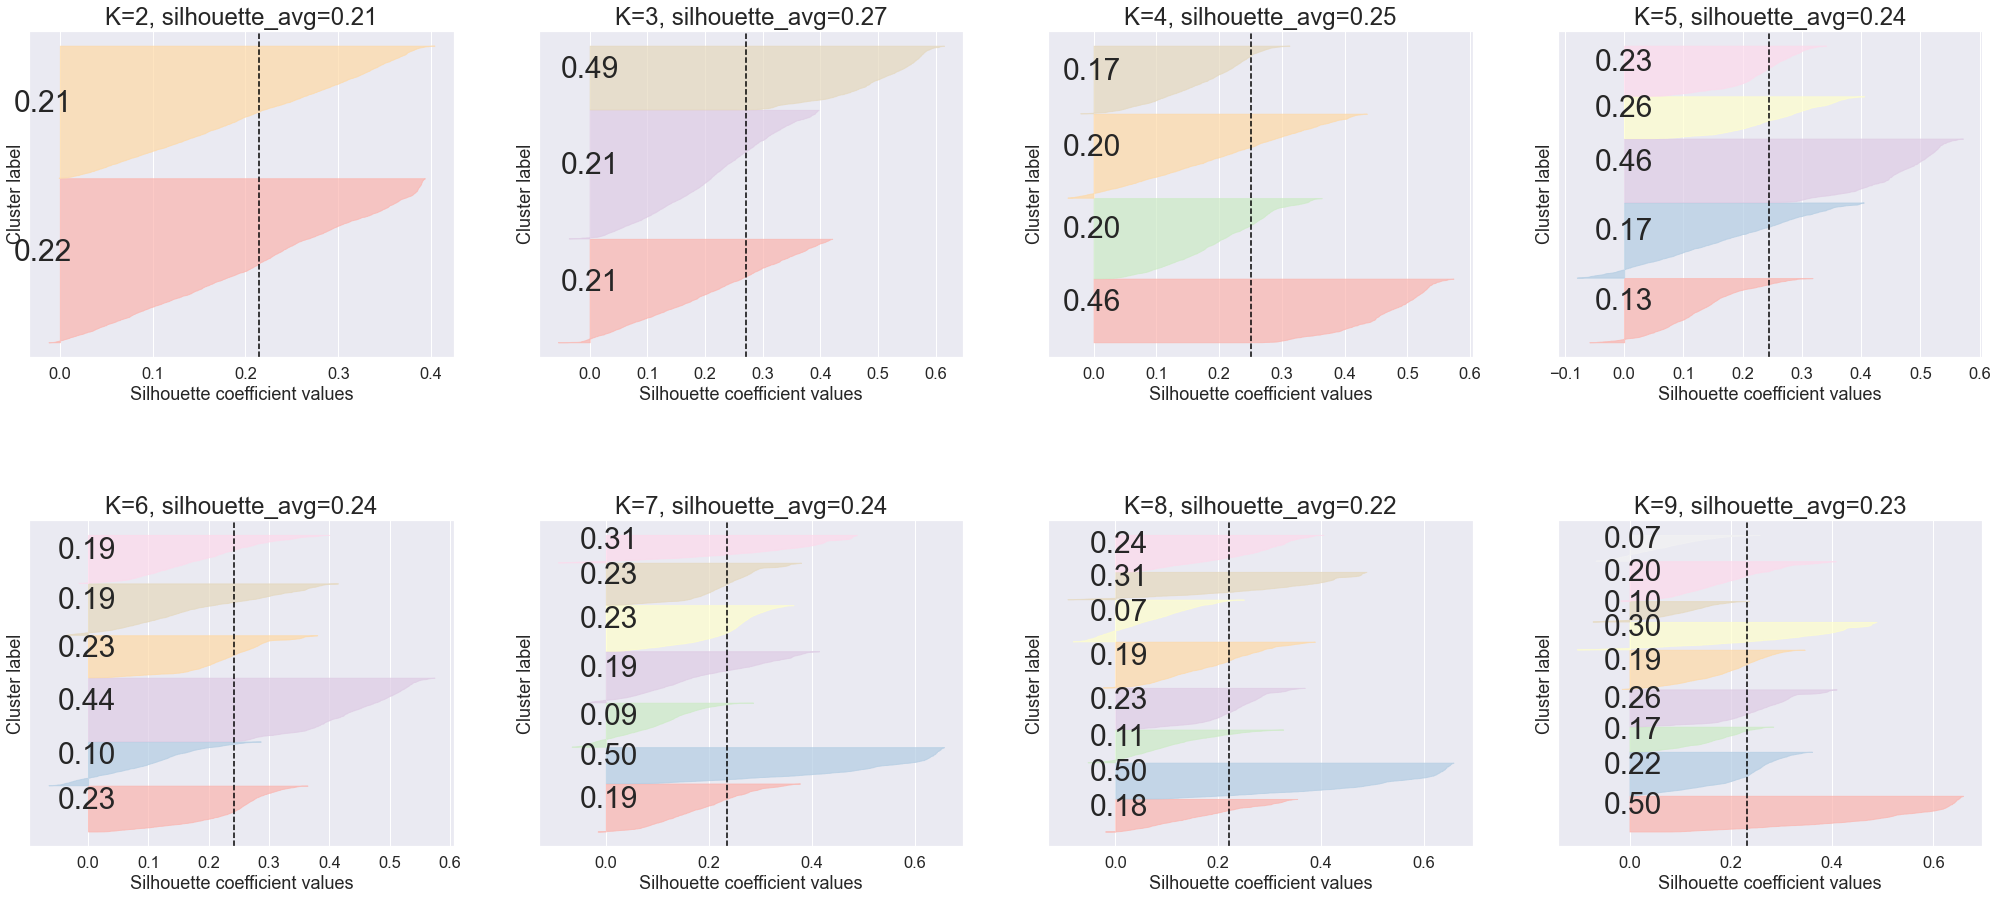

In [61]:
def optimise_k_means_silhouette_score(data, max_k):
    means = []
    silhouette = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        silhouette.append(silhouette_score(data, kmeans.labels_))

    plt.plot(means, silhouette, "o-", color="black")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Average Silhouette Score")
    plt.grid(True)
    plt.savefig("images_clustering/silhouette_scorePCA.pdf")
    plt.show()
    
k_values = range(2, 10)
pastel_cmap = plt.get_cmap("Pastel1")
fig, axs = plt.subplots(2, 4, figsize=(35, 15))
fig.subplots_adjust(hspace=0.5)
axs = axs.flatten()
table = []
for idx, k in enumerate(k_values):
    plt.sca(axs[idx])
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca)
    silhouette_avg = silhouette_score(pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(pca, cluster_labels)
    y_lower = 10
    table.append(silhouette_avg)

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = pastel_cmap(float(i) / k)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            f"{ith_cluster_silhouette_values.mean():.2f}",
        )  # Write silhouette coefficient value
        y_lower = y_upper + 10
    plt.title(f"K={k}, silhouette_avg={np.round(silhouette_avg, 2)}", fontsize=24)
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="black", linestyle="--")
    plt.yticks([])
    plt.savefig("images_clustering/silhouette_scoresPCA.pdf")
    


In [62]:
pd.DataFrame(table, index=k_values, columns=["Silhouette Score"])

Silhouette Score
2          0.214161
3          0.271306
4          0.251341
5          0.244387
6          0.241481
7          0.235314
8          0.221441
9          0.232577

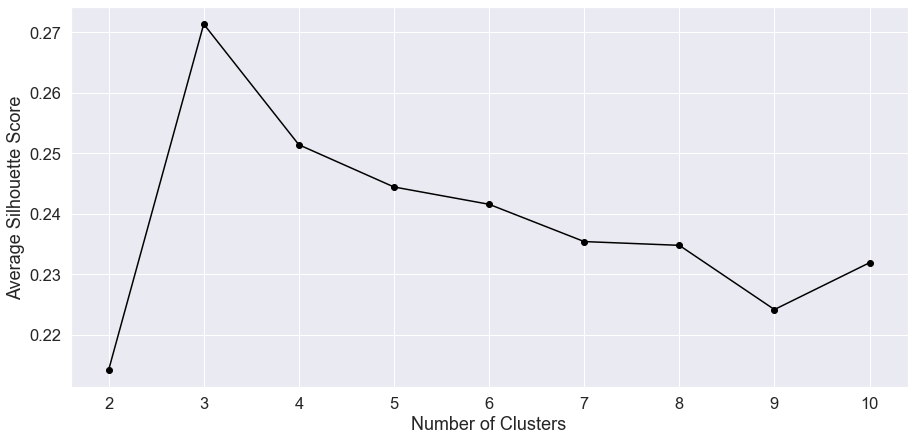

In [63]:
optimise_k_means_silhouette_score(pca, 10)

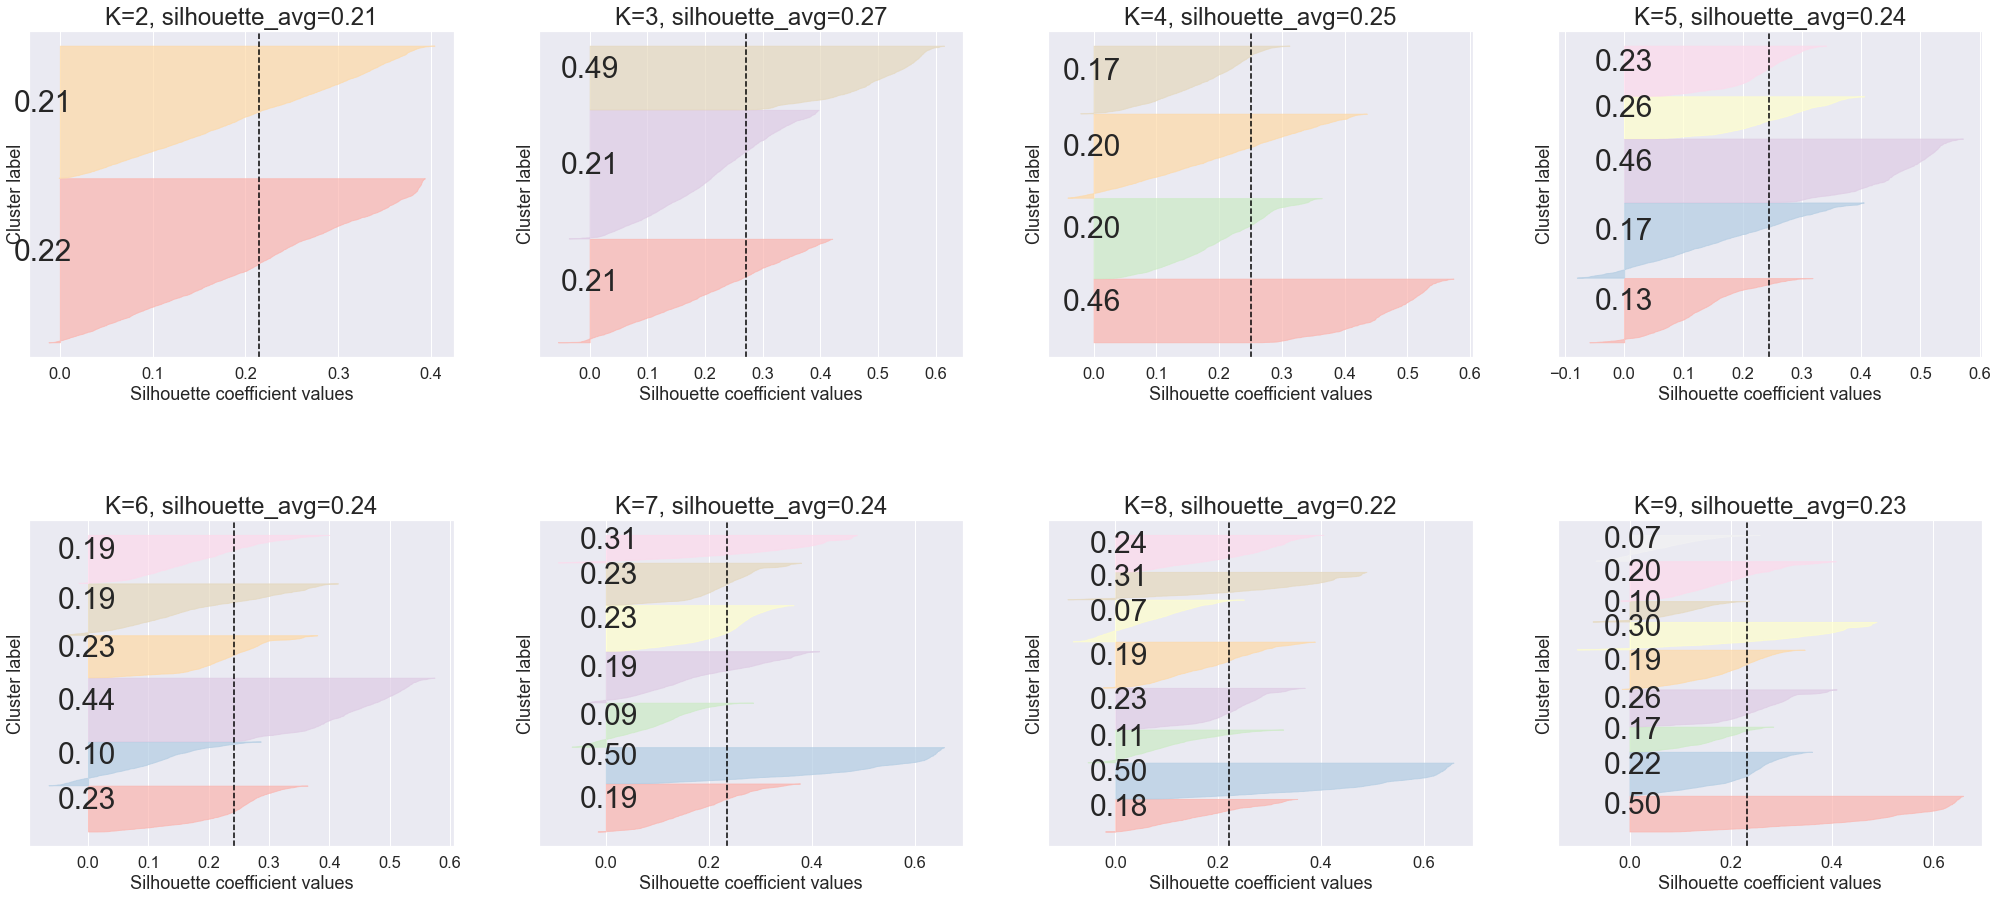

In [95]:
def optimise_k_means_silhouette_score(data, max_k):
    means = []
    silhouette = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        silhouette.append(silhouette_score(data, kmeans.labels_))

    plt.plot(means, silhouette, "o-", color="black")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Average Silhouette Score")
    plt.grid(True)
    plt.savefig("images_clustering/silhouette_scoreMDS.pdf")
    plt.show()
    
k_values = range(2, 10)
pastel_cmap = plt.get_cmap("Pastel1")
fig, axs = plt.subplots(2, 4, figsize=(35, 15))
fig.subplots_adjust(hspace=0.5)
axs = axs.flatten()
table = []
for idx, k in enumerate(k_values):
    plt.sca(axs[idx])
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca)
    silhouette_avg = silhouette_score(pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(pca, cluster_labels)
    y_lower = 10
    table.append(silhouette_avg)

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = pastel_cmap(float(i) / k)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            f"{ith_cluster_silhouette_values.mean():.2f}",
        )  # Write silhouette coefficient value
        y_lower = y_upper + 10
    plt.title(f"K={k}, silhouette_avg={np.round(silhouette_avg, 2)}", fontsize=24)
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="black", linestyle="--")
    plt.yticks([])
    plt.savefig("images_clustering/silhouette_scoresMDS.pdf")
    


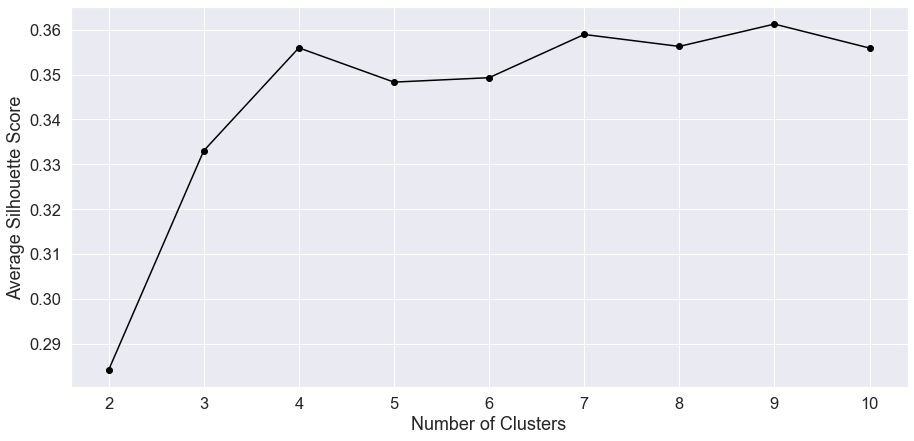

In [96]:
optimise_k_means_silhouette_score(mds, 10)

### Metoda Daviesa-Bouldina

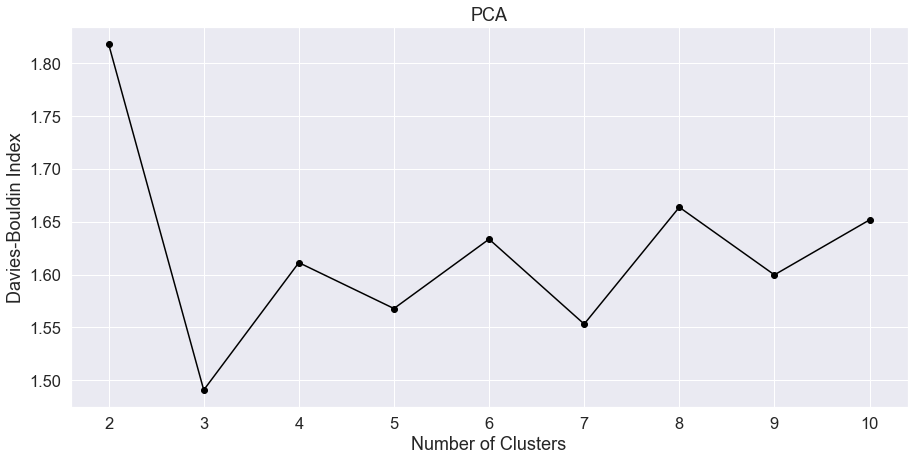

In [93]:
def optimise_k_means_davies_bouldin(data, max_k):
    davies_bouldin_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        db_index = davies_bouldin_score(data, kmeans.labels_)
        davies_bouldin_scores.append(db_index)

    plt.plot(range(2, max_k + 1), davies_bouldin_scores, "o-", color="black")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Davies-Bouldin Index")
    plt.title('PCA')
    plt.grid(True)
    plt.savefig("images_clustering/davies_bouldinPCA.pdf")
    plt.show()
optimise_k_means_davies_bouldin(pca, 10)

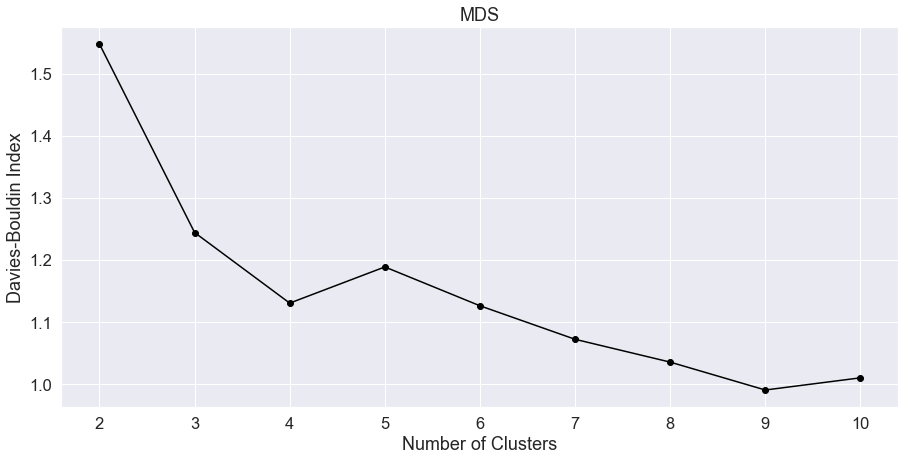

In [94]:
def optimise_k_means_davies_bouldin(data, max_k):
    davies_bouldin_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        db_index = davies_bouldin_score(data, kmeans.labels_)
        davies_bouldin_scores.append(db_index)

    plt.plot(range(2, max_k + 1), davies_bouldin_scores, "o-", color="black")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Davies-Bouldin Index")
    plt.title('MDS')
    plt.grid(True)
    plt.savefig("images_clustering/davies_bouldinMDS.pdf")
    plt.show()
optimise_k_means_davies_bouldin(mds, 10)

### calinski Harabasz

For n_clusters = 2, Calinski-Harabasz Index is 2048.4731649231726
For n_clusters = 3, Calinski-Harabasz Index is 2366.4008935829124
For n_clusters = 4, Calinski-Harabasz Index is 2093.517126389395
For n_clusters = 5, Calinski-Harabasz Index is 1873.119320467473
For n_clusters = 6, Calinski-Harabasz Index is 1750.2369104499721
For n_clusters = 7, Calinski-Harabasz Index is 1669.3571972042325
For n_clusters = 8, Calinski-Harabasz Index is 1534.5574557920722
For n_clusters = 9, Calinski-Harabasz Index is 1453.9735603179226
For n_clusters = 10, Calinski-Harabasz Index is 1365.344619878393
The best number of clusters is 3 based on Calinski-Harabasz Index.


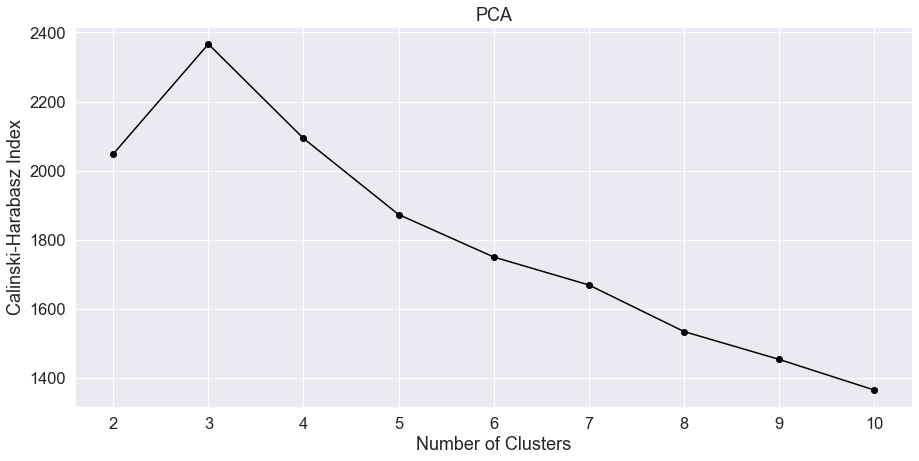

3

In [97]:
def optimise_k_means_calinski_harabasz(data):
    ch_index_values = []
    k_values = range(2, 11)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        ch_index = calinski_harabasz_score(data, cluster_labels)
        ch_index_values.append(ch_index)
        print(f"For n_clusters = {k}, Calinski-Harabasz Index is {ch_index}")

    best_k = k_values[np.argmax(ch_index_values)]
    print(f"The best number of clusters is {best_k} based on Calinski-Harabasz Index.")

    plt.plot(k_values, ch_index_values, "o-", color="black")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Calinski-Harabasz Index")
    plt.grid(True)
    plt.title('PCA')
    plt.savefig("images_clustering/calinski_harabaszPCA.pdf")
    
    plt.show()

    return best_k

optimise_k_means_calinski_harabasz(pca)

For n_clusters = 2, Calinski-Harabasz Index is 2764.177888434819
For n_clusters = 3, Calinski-Harabasz Index is 2981.231808450255
For n_clusters = 4, Calinski-Harabasz Index is 3180.74209130675
For n_clusters = 5, Calinski-Harabasz Index is 3104.8690024446396
For n_clusters = 6, Calinski-Harabasz Index is 3077.7475860829927
For n_clusters = 7, Calinski-Harabasz Index is 3087.8675948341775
For n_clusters = 8, Calinski-Harabasz Index is 3009.771488561776
For n_clusters = 9, Calinski-Harabasz Index is 2999.6748632455915
For n_clusters = 10, Calinski-Harabasz Index is 2879.322063321195
The best number of clusters is 4 based on Calinski-Harabasz Index.


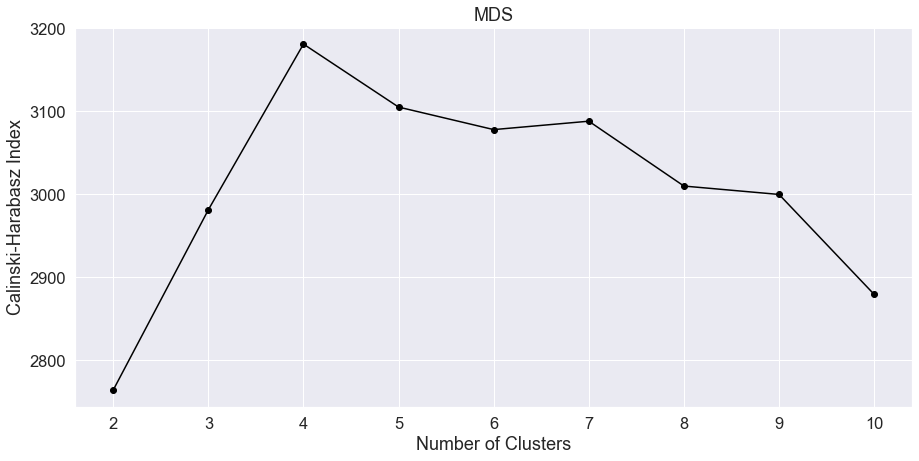

4

In [99]:
def optimise_k_means_calinski_harabasz(data):
    ch_index_values = []
    k_values = range(2, 11)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        ch_index = calinski_harabasz_score(data, cluster_labels)
        ch_index_values.append(ch_index)
        print(f"For n_clusters = {k}, Calinski-Harabasz Index is {ch_index}")

    best_k = k_values[np.argmax(ch_index_values)]
    print(f"The best number of clusters is {best_k} based on Calinski-Harabasz Index.")

    plt.plot(k_values, ch_index_values, "o-", color="black")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Calinski-Harabasz Index")
    plt.grid(True)
    plt.title('MDS')
    plt.savefig("images_clustering/calinski_harabaszMDS.pdf")
    
    plt.show()

    return best_k

optimise_k_means_calinski_harabasz(mds)

### Analiza Hierarchiczna:


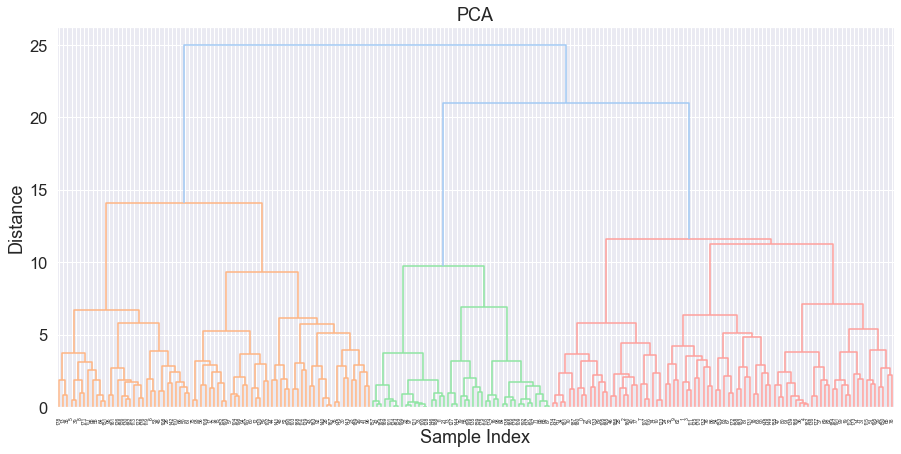

In [100]:
linkage_matrix = linkage(
    pca[:200], method="ward"
)  # dałam okrojony zbiór, bo inaczej za długo liczyło
dendrogram(linkage_matrix)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title('PCA')
plt.savefig("images_clustering/dendrogramPCA.pdf")
plt.show()

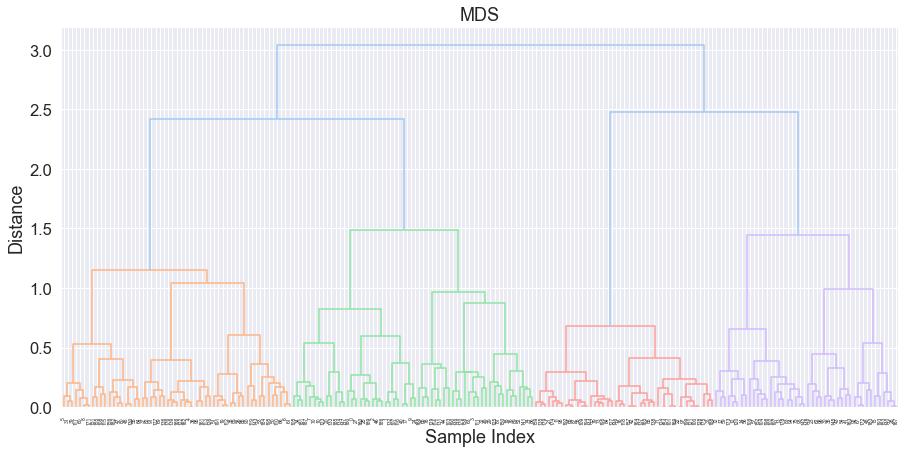

In [102]:
linkage_matrix = linkage(
    mds[:200], method="ward"
)  # dałam okrojony zbiór, bo inaczej za długo liczyło
dendrogram(linkage_matrix)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title('MDS')
plt.savefig("images_clustering/dendrogramMDS.pdf")
plt.show()

### Wizualizacja

In [67]:
pca.shape

(7021, 10)

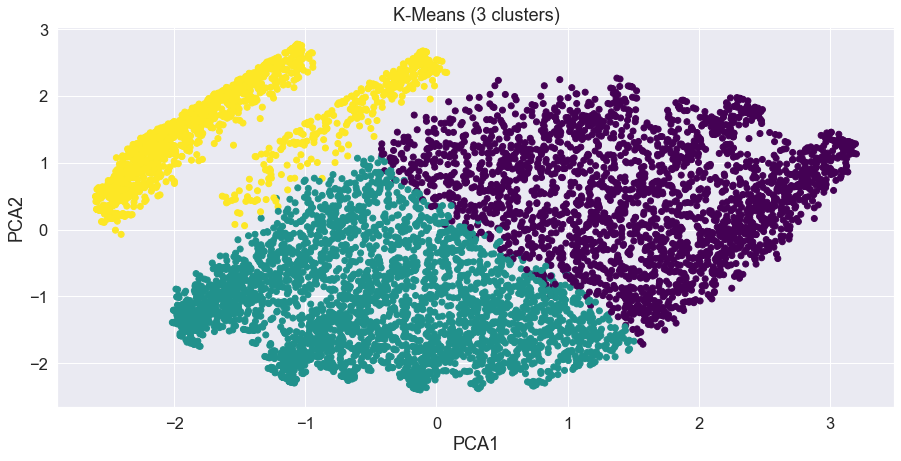

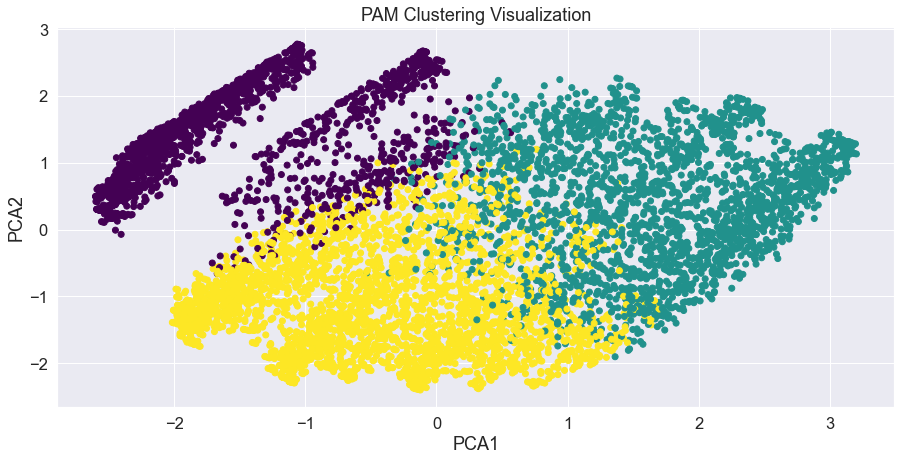

Text(0.5, 1.0, 'Agglomerative Clustering Visualization')

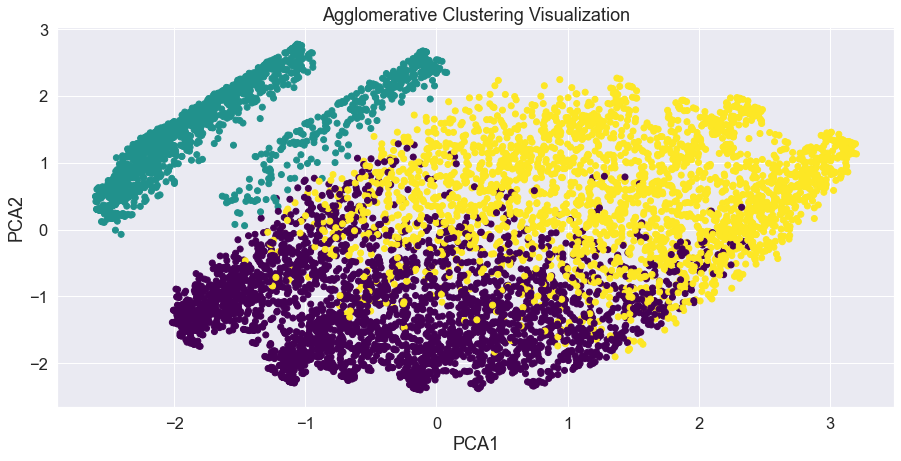

In [78]:
# fig, axs = plt.subplots(1, 3, figsize=(25, 25))
# change fontsize for titles
# plt.rcParams.update({"font.size": 30})


kmeans = KMeans(n_clusters=3)

kmeans.fit(pca)
plt.scatter(
    pca[:, 0], pca[:, 1], c=kmeans.labels_, cmap="viridis"
)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("K-Means (3 clusters)")
plt.show()

# # PAM with 3 clusters
PAM = KMedoids(n_clusters=3)
PAM.fit(pca)
plt.scatter(
    pca[:, 0], pca[:, 1], c=PAM.labels_, cmap="viridis"
)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PAM Clustering Visualization")
plt.show()

# # Agglomerative with 3 clusters
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(pca)
plt.scatter(
    pca[:, 0], pca[:, 1], c=agg.labels_, cmap="viridis"
)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Agglomerative Clustering Visualization")

# plt.savefig("images_clustering/clustering_visualizationPCA.pdf")

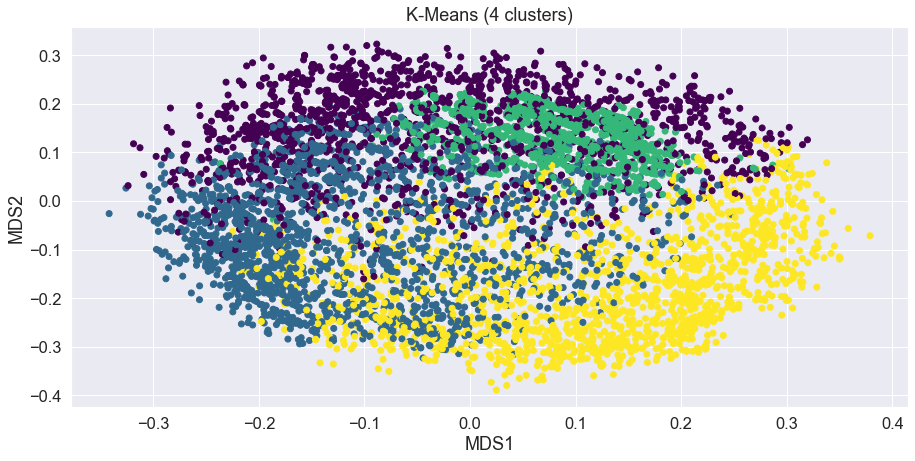

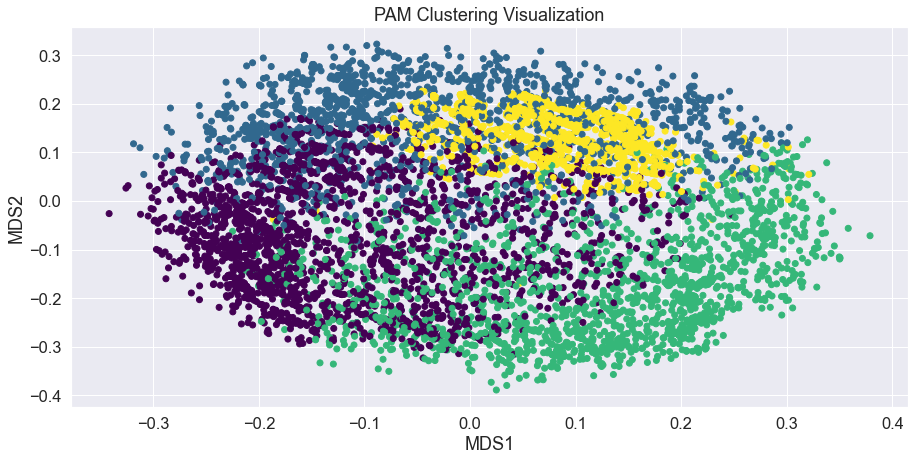

Text(0.5, 1.0, 'Agglomerative Clustering Visualization')

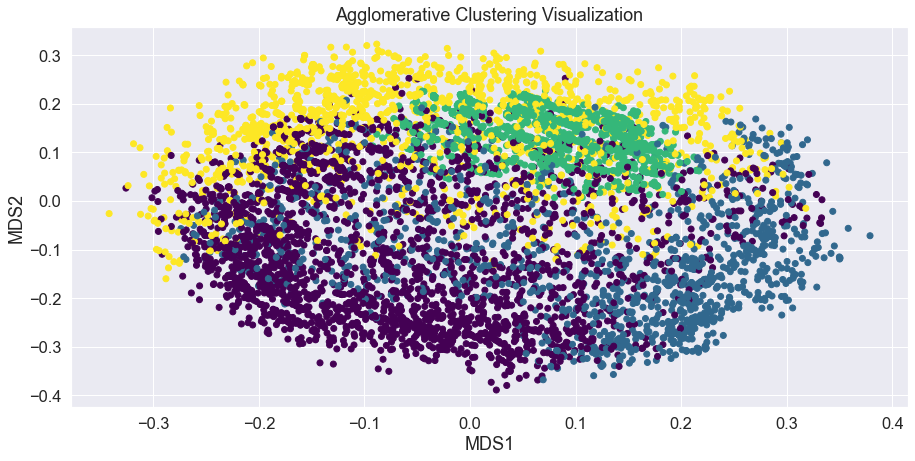

In [104]:

kmeans = KMeans(n_clusters=4)

kmeans.fit(mds)
plt.scatter(
    mds[:, 0], mds[:, 1], c=kmeans.labels_, cmap="viridis"
)
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.title("K-Means (4 clusters)")
plt.show()

# # PAM with 4 clusters
PAM = KMedoids(n_clusters=4)
PAM.fit(mds)
plt.scatter(
    mds[:, 0], mds[:, 1], c=PAM.labels_, cmap="viridis"
)

plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.title("PAM Clustering Visualization")
plt.show()

# # Agglomerative with 4 clusters
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(mds)
plt.scatter(
    mds[:, 0], mds[:, 1], c=agg.labels_, cmap="viridis"
)

plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.title("Agglomerative Clustering Visualization")

# Classification


In [138]:
from imblearn import over_sampling, under_sampling #RandomOverSampler, RandomUnderSampler
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [126]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca, y, test_size=0.2, random_state=31)
X_train_mds, X_test_mds, y_train, y_test = train_test_split(mds, y, test_size=0.2, random_state=31)

In [128]:
X_pca_over, y_pca_over = over_sampling.RandomOverSampler(random_state=32).fit_resample(X_train_pca, y_train)
X_pca_under, y_pca_under = under_sampling.RandomUnderSampler(random_state=33).fit_resample(X_train_pca, y_train)

X_mds_over, y_over = over_sampling.RandomOverSampler(random_state=32).fit_resample(X_train_mds, y_train)
X_mds_under, y_under = under_sampling.RandomUnderSampler(random_state=33).fit_resample(X_train_mds, y_train)


In [135]:
# The same values in both groups
np.sum((y_over == y_pca_over)) == y_over.shape[0]

# So we will use only y_over and y_under - because for PCA it is exactly the same

True

## 1. KNN

In [136]:
n_values = range(1, 100)

### 1.1 PCA


n: 40 Acc: 0.8277580071174377


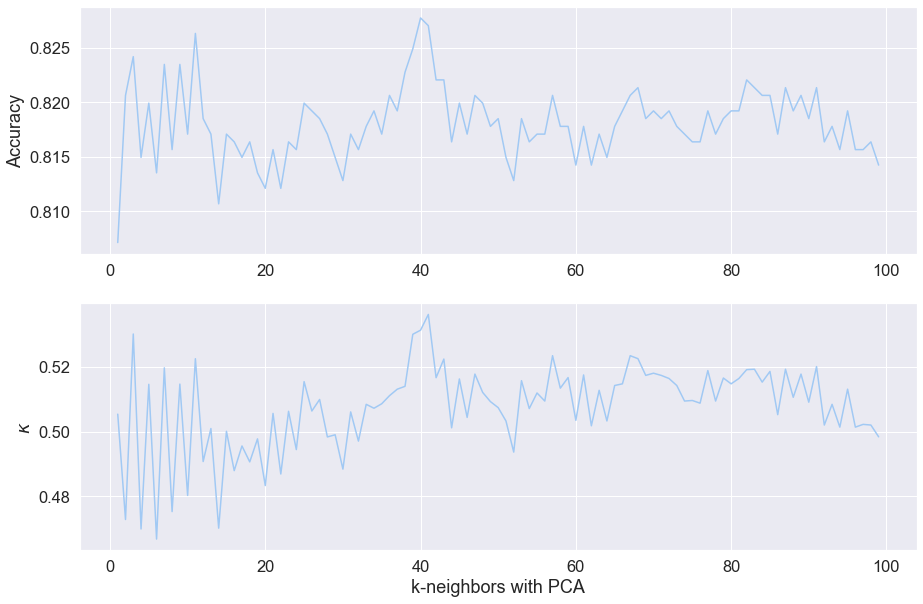

In [151]:
best_n = None
best_accuracy = 0
accuracy_values = []
kappa = []

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    
    accuracy = knn.score(X_test_pca, y_test)
    accuracy_values.append(accuracy)
    kappa.append(cohen_kappa_score(y_pred, y_test))
    if accuracy > best_accuracy:
        best_n = n
        best_accuracy = accuracy
        

print('n:', best_n, 'Acc:', accuracy_values[best_n-1])
plt.subplot(211)
plt.plot(n_values, accuracy_values)
plt.ylabel("Accuracy")
plt.subplot(212)
plt.plot(n_values, kappa)

plt.xlabel("k-neighbors with PCA")
plt.ylabel(r"$\kappa$")
plt.savefig('knn_n_PCA.pdf')

In [144]:
kappa[best_n-1]

0.5313115996967399

Acc = 0.8163701067615659
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1015
           1       0.72      0.55      0.62       390

    accuracy                           0.82      1405
   macro avg       0.78      0.73      0.75      1405
weighted avg       0.81      0.82      0.81      1405

0.506278943067284


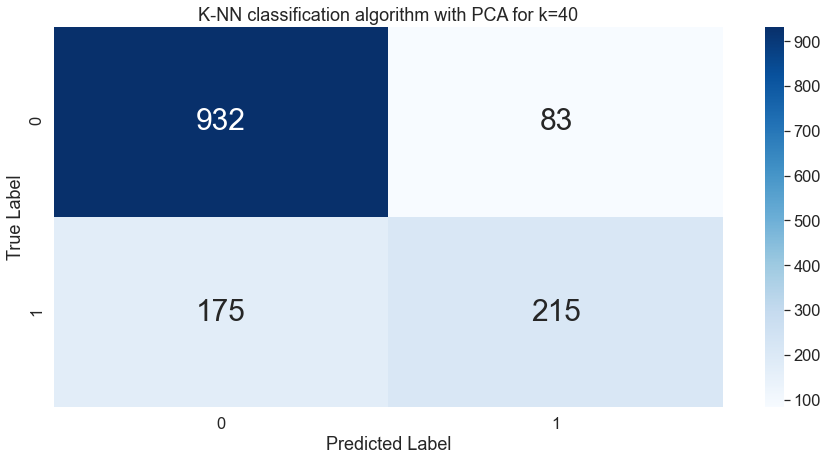

In [146]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
print(f'Acc = {knn.score(X_test_pca, y_test)}')
print(classification_report(y_test, y_pred))

print(cohen_kappa_score(y_test, y_pred))

#generating confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title(fr'K-NN classification algorithm with PCA for k={40}')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#### Over-Under Sampling

0.8277580071174377
0.7743772241992882
0.7722419928825622
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      1015
           1       0.76      0.55      0.64       390

    accuracy                           0.83      1405
   macro avg       0.80      0.74      0.76      1405
weighted avg       0.82      0.83      0.82      1405

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1015
           1       0.57      0.80      0.66       390

    accuracy                           0.77      1405
   macro avg       0.74      0.78      0.75      1405
weighted avg       0.81      0.77      0.78      1405

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1015
           1       0.56      0.83      0.67       390

    accuracy                           0.77      1405
   macro avg       0.74      0.79      0.75      1405
weighted avg     

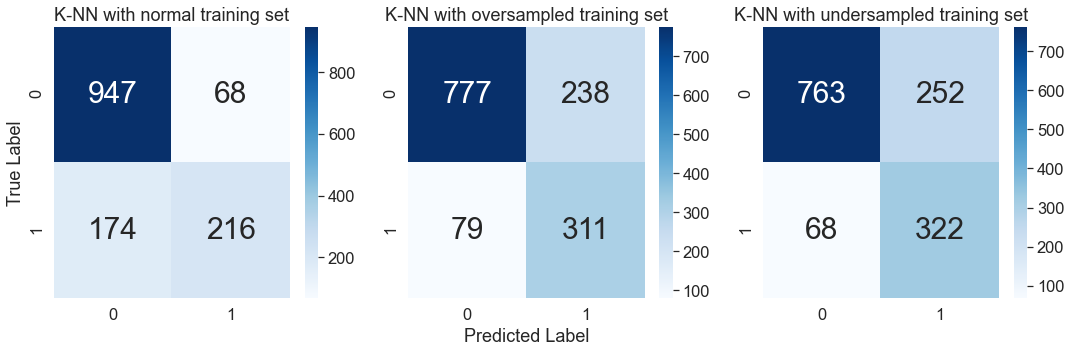

In [152]:
knn = KNeighborsClassifier(n_neighbors=40)

knn_model = KNeighborsClassifier(n_neighbors=40).fit(X_train_pca, y_train)
knn_over = KNeighborsClassifier(n_neighbors=40).fit(X_pca_over, y_over)
knn_under = KNeighborsClassifier(n_neighbors=40).fit(X_pca_under, y_under)
print(knn_model.score(X_test_pca, y_test))
print(knn_over.score(X_test_pca, y_test))
print(knn_under.score(X_test_pca, y_test))

knn_pred =knn_model.predict(X_test_pca)
print(classification_report(y_test, knn_pred))
knn_over_pred = knn_over.predict(X_test_pca)
print(classification_report(y_test, knn_over_pred))
knn_under_pred =knn_under.predict(X_test_pca)
print(classification_report(y_test, knn_under_pred))

print(cohen_kappa_score(y_test, knn_pred))
print(cohen_kappa_score(y_test, knn_over_pred))
print(cohen_kappa_score(y_test, knn_under_pred))



#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('K-NN with normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, knn_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('K-NN with oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, knn_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('K-NN with undersampled training set')


plt.savefig('knn_conf_matixPCA.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)

### 1.1 MDS


n: 1 Acc: 0.900355871886121


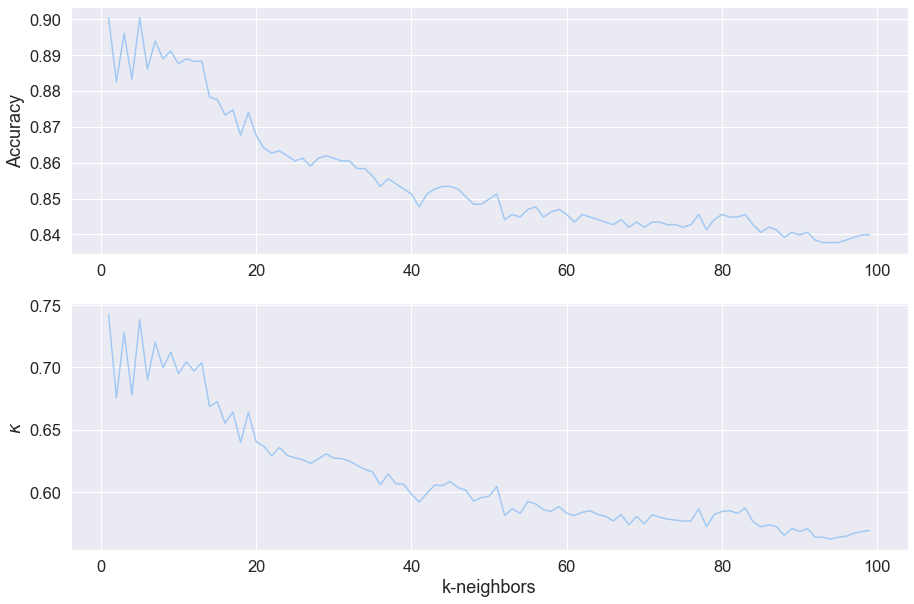

In [148]:
best_n = None
best_accuracy = 0
accuracy_values = []
kappa = []

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_mds, y_train)
    y_pred = knn.predict(X_test_mds)
    
    accuracy = knn.score(X_test_mds, y_test)
    accuracy_values.append(accuracy)
    kappa.append(cohen_kappa_score(y_pred, y_test))
    if accuracy > best_accuracy:
        best_n = n
        best_accuracy = accuracy
        

print('n:', best_n, 'Acc:', accuracy_values[best_n-1])
plt.subplot(211)
plt.plot(n_values, accuracy_values)
plt.ylabel("Accuracy")
plt.subplot(212)
plt.plot(n_values, kappa)

plt.xlabel("k-neighbors")
plt.ylabel(r"$\kappa$")
plt.savefig('knn_n_MDS.pdf')

0.900355871886121
0.900355871886121
0.8761565836298932
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1015
           1       0.86      0.76      0.81       390

    accuracy                           0.90      1405
   macro avg       0.89      0.86      0.87      1405
weighted avg       0.90      0.90      0.90      1405

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1015
           1       0.86      0.76      0.81       390

    accuracy                           0.90      1405
   macro avg       0.89      0.86      0.87      1405
weighted avg       0.90      0.90      0.90      1405

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1015
           1       0.75      0.84      0.79       390

    accuracy                           0.88      1405
   macro avg       0.84      0.86      0.85      1405
weighted avg       

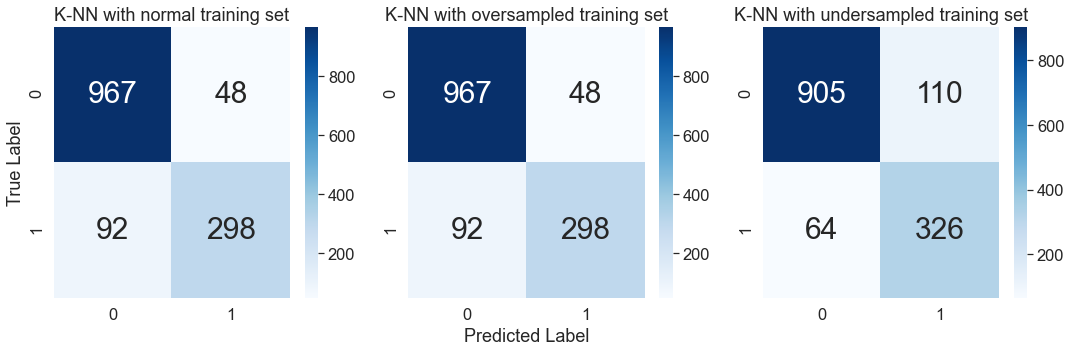

In [153]:
knn = KNeighborsClassifier(n_neighbors=1)

knn_model = KNeighborsClassifier(n_neighbors=1).fit(X_train_mds, y_train)
knn_over = KNeighborsClassifier(n_neighbors=1).fit(X_mds_over, y_over)
knn_under = KNeighborsClassifier(n_neighbors=1).fit(X_mds_under, y_under)
print(knn_model.score(X_test_mds, y_test))
print(knn_over.score(X_test_mds, y_test))
print(knn_under.score(X_test_mds, y_test))

knn_pred =knn_model.predict(X_test_mds)
print(classification_report(y_test, knn_pred))
knn_over_pred = knn_over.predict(X_test_mds)
print(classification_report(y_test, knn_over_pred))
knn_under_pred =knn_under.predict(X_test_mds)
print(classification_report(y_test, knn_under_pred))

print(cohen_kappa_score(y_test, knn_pred))
print(cohen_kappa_score(y_test, knn_over_pred))
print(cohen_kappa_score(y_test, knn_under_pred))



#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('K-NN with normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, knn_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('K-NN with oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, knn_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('K-NN with undersampled training set')


plt.savefig('knn_conf_matixMDS.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)

## 2. LDA & QDA

In [150]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

### 2.1 PCA


0.8270462633451957
0.5536037655672866
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1015
           1       0.71      0.63      0.67       390

    accuracy                           0.83      1405
   macro avg       0.79      0.77      0.78      1405
weighted avg       0.82      0.83      0.82      1405

0.7772241992882563
0.7765124555160142
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1015
           1       0.57      0.82      0.67       390

    accuracy                           0.78      1405
   macro avg       0.74      0.79      0.75      1405
weighted avg       0.82      0.78      0.79      1405

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1015
           1       0.75      0.84      0.79       390

    accuracy                           0.88      1405
   macro avg       0.84      0.86      0.85      140

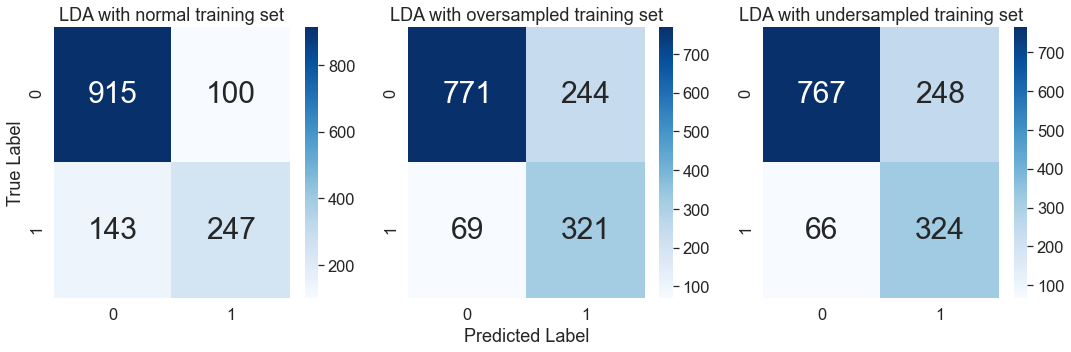

In [154]:
# Normal
lda = LinearDiscriminantAnalysis().fit(X_train_pca, y_train)
print(lda.score(X_test_pca, y_test))

lda_pred = lda.predict(X_test_pca)
#print(classification_report(y_test, lda_pred))
print(cohen_kappa_score(y_test, lda_pred))
print(classification_report(y_test, lda_pred))

# Over-under sampling
lda_over = LinearDiscriminantAnalysis().fit(X_pca_over, y_over)
lda_under = LinearDiscriminantAnalysis().fit(X_pca_under, y_under)

print(lda_over.score(X_test_pca, y_test))
print(lda_under.score(X_test_pca, y_test))

lda_over_pred = lda_over.predict(X_test_pca)
print(classification_report(y_test, lda_over_pred))

lda_under_pred = lda_under.predict(X_test_pca)
print(classification_report(y_test, knn_under_pred))

print(cohen_kappa_score(y_test, lda_over_pred))
print(cohen_kappa_score(y_test, lda_under_pred))

#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, lda_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('LDA with normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, lda_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('LDA with oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, lda_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('LDA with undersampled training set')


plt.savefig('lda_conf_matixPCA.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


0.7914590747330961
0.511999525827579
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1015
           1       0.60      0.73      0.66       390

    accuracy                           0.79      1405
   macro avg       0.74      0.77      0.75      1405
weighted avg       0.81      0.79      0.80      1405

0.7480427046263345
0.7430604982206406
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1015
           1       0.53      0.82      0.64       390

    accuracy                           0.75      1405
   macro avg       0.72      0.77      0.72      1405
weighted avg       0.81      0.75      0.76      1405

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1015
           1       0.52      0.82      0.64       390

    accuracy                           0.74      1405
   macro avg       0.72      0.77      0.72      1405

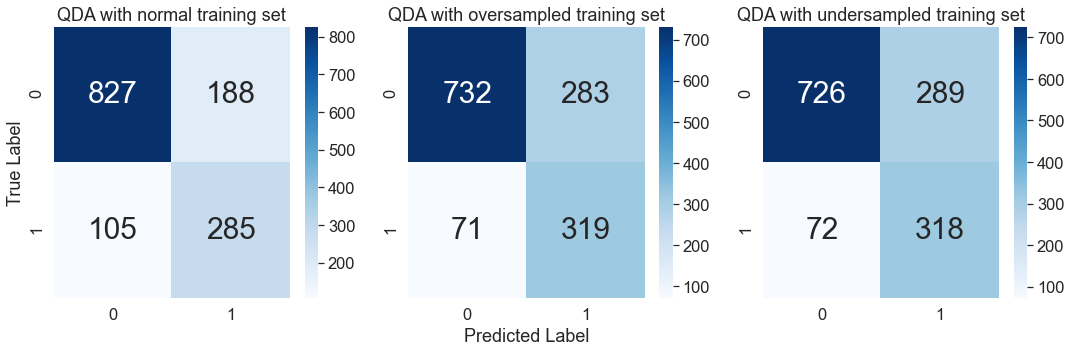

In [155]:
# Normal
qda = QuadraticDiscriminantAnalysis().fit(X_train_pca, y_train)
print(qda.score(X_test_pca, y_test))

qda_pred = qda.predict(X_test_pca)
#print(classification_report(y_test, lda_pred))
print(cohen_kappa_score(y_test, qda_pred))
print(classification_report(y_test, qda_pred))

# Over-under sampling
qda_over = QuadraticDiscriminantAnalysis().fit(X_pca_over, y_over)
qda_under = QuadraticDiscriminantAnalysis().fit(X_pca_under, y_under)

print(qda_over.score(X_test_pca, y_test))

print(qda_under.score(X_test_pca, y_test))


qda_over_pred = qda_over.predict(X_test_pca)
print(classification_report(y_test, qda_over_pred))
qda_under_pred = qda_under.predict(X_test_pca)
print(classification_report(y_test, qda_under_pred))
print(cohen_kappa_score(y_test, qda_over_pred))
print(cohen_kappa_score(y_test, qda_under_pred))

#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, qda_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('QDA with normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, qda_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('QDA with oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, qda_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('QDA with undersampled training set')


plt.savefig('qda_conf_matixPCA.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


### 2.1 MDS


0.8284697508896797
0.5706115461433598
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1015
           1       0.69      0.68      0.69       390

    accuracy                           0.83      1405
   macro avg       0.79      0.78      0.79      1405
weighted avg       0.83      0.83      0.83      1405

0.7601423487544484
0.7594306049822064
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1015
           1       0.54      0.84      0.66       390

    accuracy                           0.76      1405
   macro avg       0.73      0.78      0.74      1405
weighted avg       0.82      0.76      0.77      1405

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1015
           1       0.75      0.84      0.79       390

    accuracy                           0.88      1405
   macro avg       0.84      0.86      0.85      140

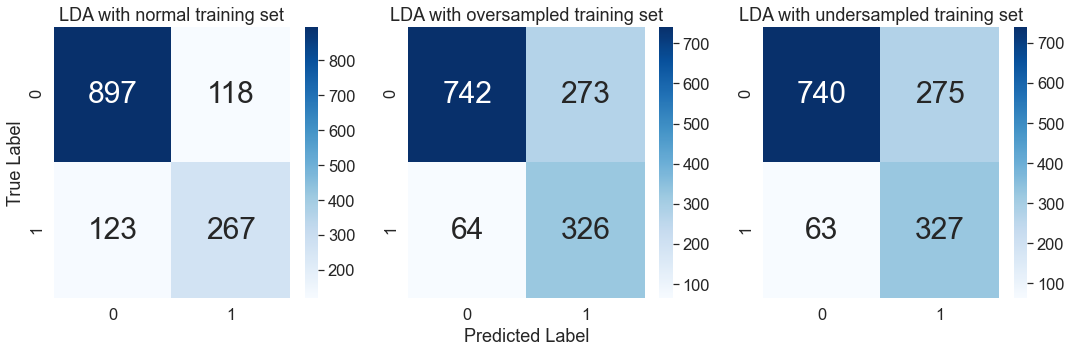

In [156]:
# Normal
lda = LinearDiscriminantAnalysis().fit(X_train_mds, y_train)
print(lda.score(X_test_mds, y_test))

lda_pred = lda.predict(X_test_mds)
#print(classification_report(y_test, lda_pred))
print(cohen_kappa_score(y_test, lda_pred))
print(classification_report(y_test, lda_pred))

# Over-under sampling
lda_over = LinearDiscriminantAnalysis().fit(X_mds_over, y_over)
lda_under = LinearDiscriminantAnalysis().fit(X_mds_under, y_under)

print(lda_over.score(X_test_mds, y_test))
print(lda_under.score(X_test_mds, y_test))

lda_over_pred = lda_over.predict(X_test_mds)
print(classification_report(y_test, lda_over_pred))

lda_under_pred = lda_under.predict(X_test_mds)
print(classification_report(y_test, knn_under_pred))

print(cohen_kappa_score(y_test, lda_over_pred))
print(cohen_kappa_score(y_test, lda_under_pred))

#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, lda_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('LDA with normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, lda_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('LDA with oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, lda_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('LDA with undersampled training set')


plt.savefig('lda_conf_matixMDS.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


0.8163701067615659
0.5581814857700043
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1015
           1       0.65      0.73      0.69       390

    accuracy                           0.82      1405
   macro avg       0.77      0.79      0.78      1405
weighted avg       0.82      0.82      0.82      1405

0.7451957295373666
0.7451957295373666
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1015
           1       0.53      0.84      0.65       390

    accuracy                           0.75      1405
   macro avg       0.72      0.77      0.72      1405
weighted avg       0.81      0.75      0.76      1405

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1015
           1       0.53      0.84      0.65       390

    accuracy                           0.75      1405
   macro avg       0.72      0.77      0.72      140

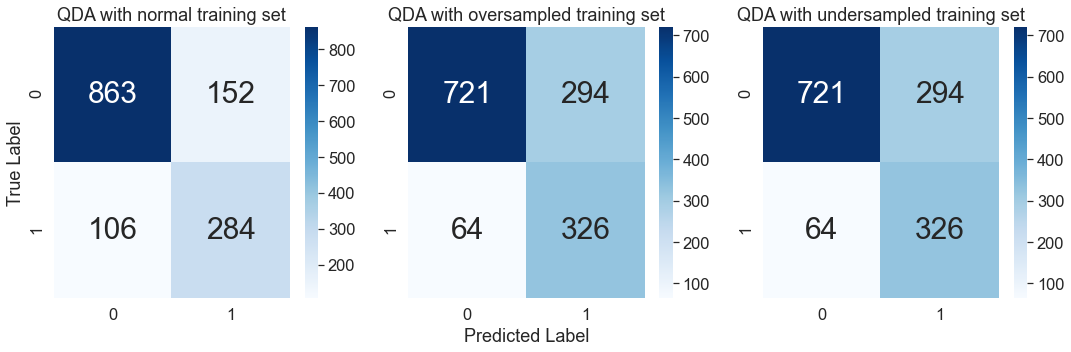

In [157]:
# Normal
qda = QuadraticDiscriminantAnalysis().fit(X_train_mds, y_train)
print(qda.score(X_test_mds, y_test))

qda_pred = qda.predict(X_test_mds)
#print(classification_report(y_test, lda_pred))
print(cohen_kappa_score(y_test, qda_pred))
print(classification_report(y_test, qda_pred))

# Over-under sampling
qda_over = QuadraticDiscriminantAnalysis().fit(X_mds_over, y_over)
qda_under = QuadraticDiscriminantAnalysis().fit(X_mds_under, y_under)

print(qda_over.score(X_test_mds, y_test))

print(qda_under.score(X_test_mds, y_test))


qda_over_pred = qda_over.predict(X_test_mds)
print(classification_report(y_test, qda_over_pred))
qda_under_pred = qda_under.predict(X_test_mds)
print(classification_report(y_test, qda_under_pred))
print(cohen_kappa_score(y_test, qda_over_pred))
print(cohen_kappa_score(y_test, qda_under_pred))

#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, qda_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('QDA with normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, qda_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('QDA with oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, qda_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('QDA with undersampled training set')


plt.savefig('qda_conf_matixMDS.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


## 3. Decision tree

In [158]:
from sklearn.tree import DecisionTreeClassifier

### 3.1 PCA


0.8078291814946619
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1015
           1       0.66      0.64      0.65       390

    accuracy                           0.81      1405
   macro avg       0.76      0.75      0.76      1405
weighted avg       0.81      0.81      0.81      1405

0.5154863018072673
0.8078291814946619
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1015
           1       0.67      0.60      0.64       390

    accuracy                           0.81      1405
   macro avg       0.76      0.74      0.75      1405
weighted avg       0.80      0.81      0.80      1405

0.5052171644711099


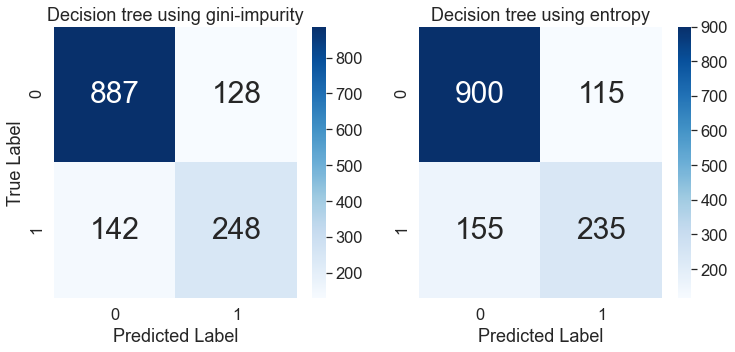

In [159]:
tree = DecisionTreeClassifier().fit(X_train_pca, y_train)
print(tree.score(X_test_pca, y_test))
tree_pred = tree.predict(X_test_pca)
print(classification_report(y_test, tree_pred))
print(cohen_kappa_score(y_test, tree_pred))

tree_e = DecisionTreeClassifier(criterion='entropy').fit(X_train_pca, y_train)
print(tree_e.score(X_test_pca, y_test))
tree_pred_e = tree_e.predict(X_test_pca)
print(classification_report(y_test, tree_pred_e))
print(cohen_kappa_score(y_test, tree_pred_e))


#generating confusion matrix
plt.rcParams["figure.figsize"] = (12, 5)
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Decision tree using gini-impurity')
plt.xlabel("Predicted Label")
plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, tree_pred_e), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Decision tree using entropy')


plt.savefig('tree_gini_e_conf_matixPCA.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


0.8163701067615659
0.7551601423487544
0.5347920944558522
0.4447469699580676


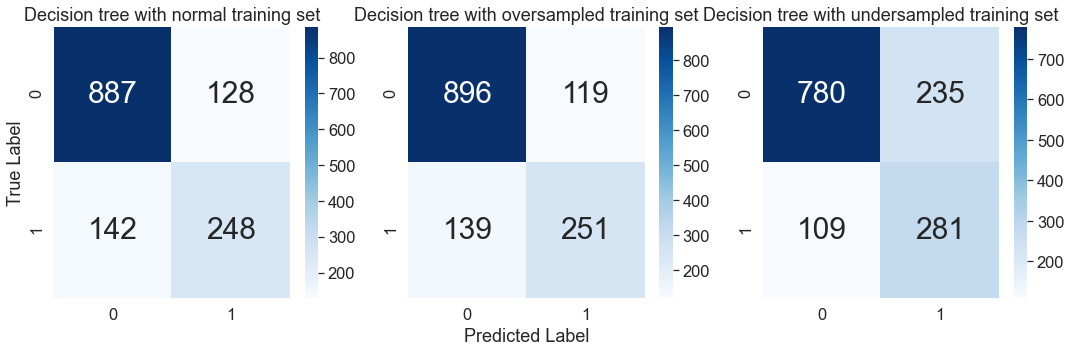

In [160]:
# Over-under sampling
tree_over = DecisionTreeClassifier().fit(X_pca_over, y_over)
tree_under = DecisionTreeClassifier().fit(X_pca_under, y_under)

print(tree_over.score(X_test_pca, y_test))
print(tree_under.score(X_test_pca, y_test))

tree_over_pred = tree_over.predict(X_test_pca)
tree_under_pred = tree_under.predict(X_test_pca)

print(cohen_kappa_score(y_test, tree_over_pred))
print(cohen_kappa_score(y_test, tree_under_pred))

#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Decision tree with normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, tree_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Decision tree with oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, tree_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Decision tree with undersampled training set')


plt.savefig('tree_conf_matixPCA.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)

0.80711743772242
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1015
           1       0.67      0.59      0.63       390

    accuracy                           0.81      1405
   macro avg       0.76      0.74      0.75      1405
weighted avg       0.80      0.81      0.80      1405

0.5013521919916184
0.8099644128113879
0.7622775800711744
0.5189497643702112
0.4616611219456235


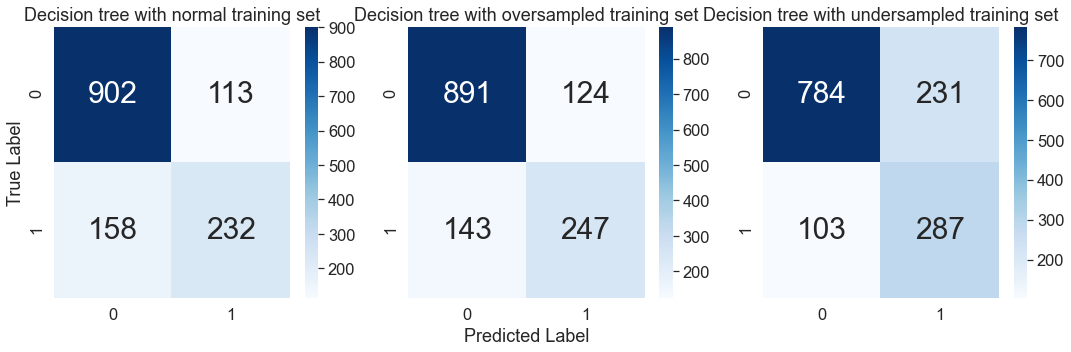

In [161]:
tree = DecisionTreeClassifier(criterion='entropy').fit(X_train_pca, y_train)
print(tree.score(X_test_pca, y_test))
tree_pred = tree.predict(X_test_pca)
print(classification_report(y_test, tree_pred))
print(cohen_kappa_score(y_test, tree_pred))

# Over-under sampling
tree_over = DecisionTreeClassifier(criterion='entropy').fit(X_pca_over, y_over)
tree_under = DecisionTreeClassifier(criterion='entropy').fit(X_pca_under, y_under)

print(tree_over.score(X_test_pca, y_test))
print(tree_under.score(X_test_pca, y_test))

tree_over_pred = tree_over.predict(X_test_pca)
tree_under_pred = tree_under.predict(X_test_pca)

print(cohen_kappa_score(y_test, tree_over_pred))
print(cohen_kappa_score(y_test, tree_under_pred))

#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Decision tree with normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, tree_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Decision tree with oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, tree_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Decision tree with undersampled training set')


plt.savefig('tree_conf_matix_entrophy_PCA.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


### 3.2 MDS


0.8790035587188612
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1015
           1       0.81      0.74      0.77       390

    accuracy                           0.88      1405
   macro avg       0.85      0.84      0.85      1405
weighted avg       0.88      0.88      0.88      1405

0.6909890678569119
0.8854092526690391
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1015
           1       0.82      0.75      0.79       390

    accuracy                           0.89      1405
   macro avg       0.86      0.84      0.85      1405
weighted avg       0.88      0.89      0.88      1405

0.7071116434143656


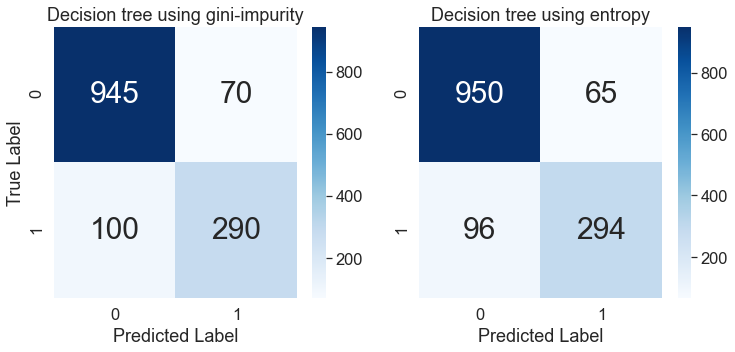

In [162]:
tree = DecisionTreeClassifier().fit(X_train_mds, y_train)
print(tree.score(X_test_mds, y_test))
tree_pred = tree.predict(X_test_mds)
print(classification_report(y_test, tree_pred))
print(cohen_kappa_score(y_test, tree_pred))

tree_e = DecisionTreeClassifier(criterion='entropy').fit(X_train_mds, y_train)
print(tree_e.score(X_test_mds, y_test))
tree_pred_e = tree_e.predict(X_test_mds)
print(classification_report(y_test, tree_pred_e))
print(cohen_kappa_score(y_test, tree_pred_e))


#generating confusion matrix
plt.rcParams["figure.figsize"] = (12, 5)
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Decision tree using gini-impurity')
plt.xlabel("Predicted Label")
plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, tree_pred_e), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Decision tree using entropy')


plt.savefig('tree_gini_e_conf_matixMDS.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


0.8854092526690391
0.8583629893238434
0.7085268820668105
0.6675742353535654


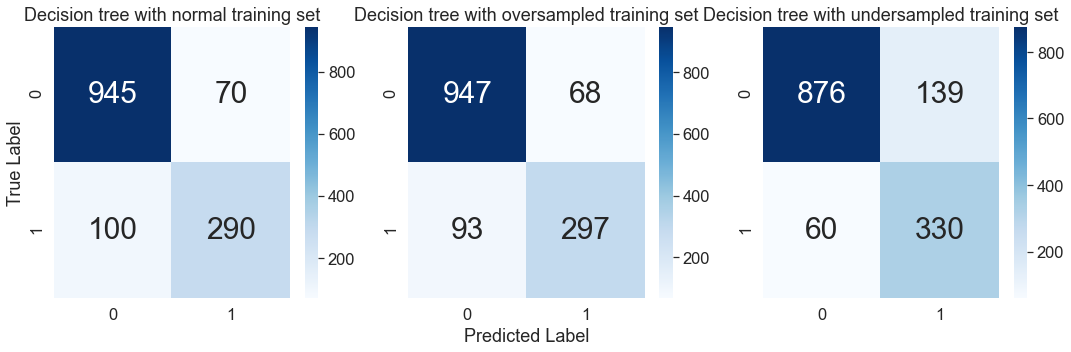

In [163]:
# Over-under sampling
tree_over = DecisionTreeClassifier().fit(X_mds_over, y_over)
tree_under = DecisionTreeClassifier().fit(X_mds_under, y_under)

print(tree_over.score(X_test_mds, y_test))
print(tree_under.score(X_test_mds, y_test))

tree_over_pred = tree_over.predict(X_test_mds)
tree_under_pred = tree_under.predict(X_test_mds)

print(cohen_kappa_score(y_test, tree_over_pred))
print(cohen_kappa_score(y_test, tree_under_pred))

#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Decision tree with normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, tree_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Decision tree with oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, tree_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Decision tree with undersampled training set')


plt.savefig('tree_conf_matixMDS.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)

0.8918149466192171
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1015
           1       0.83      0.76      0.80       390

    accuracy                           0.89      1405
   macro avg       0.87      0.85      0.86      1405
weighted avg       0.89      0.89      0.89      1405

0.7232603343268109
0.8875444839857651
0.8512455516014235
0.7146474709171541
0.6524191400585919


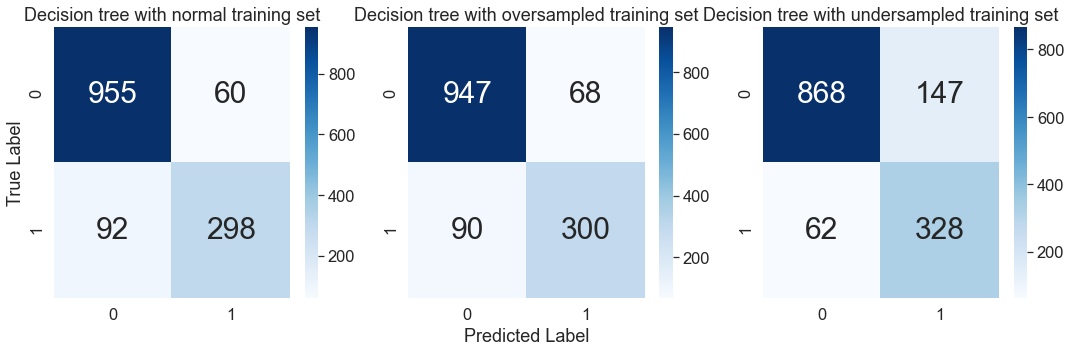

In [164]:
tree = DecisionTreeClassifier(criterion='entropy').fit(X_train_mds, y_train)
print(tree.score(X_test_mds, y_test))
tree_pred = tree.predict(X_test_mds)
print(classification_report(y_test, tree_pred))
print(cohen_kappa_score(y_test, tree_pred))

# Over-under sampling
tree_over = DecisionTreeClassifier(criterion='entropy').fit(X_mds_over, y_over)
tree_under = DecisionTreeClassifier(criterion='entropy').fit(X_mds_under, y_under)

print(tree_over.score(X_test_mds, y_test))
print(tree_under.score(X_test_mds, y_test))

tree_over_pred = tree_over.predict(X_test_mds)
tree_under_pred = tree_under.predict(X_test_mds)

print(cohen_kappa_score(y_test, tree_over_pred))
print(cohen_kappa_score(y_test, tree_under_pred))

#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Decision tree with normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, tree_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Decision tree with oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, tree_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Decision tree with undersampled training set')


plt.savefig('tree_conf_matix_entrophy_MDS.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


## 4.  Random forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

### 4.1 PCA


0.8491103202846975
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1015
           1       0.80      0.61      0.69       390

    accuracy                           0.85      1405
   macro avg       0.83      0.78      0.80      1405
weighted avg       0.84      0.85      0.84      1405

[[955  60]
 [152 238]]
kappa: 0.5943067284118768
ENTROPHY:
0.8512455516014235
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1015
           1       0.81      0.61      0.69       390

    accuracy                           0.85      1405
   macro avg       0.84      0.78      0.80      1405
weighted avg       0.85      0.85      0.84      1405

[[960  55]
 [154 236]]
kappa: 0.5976501216044943


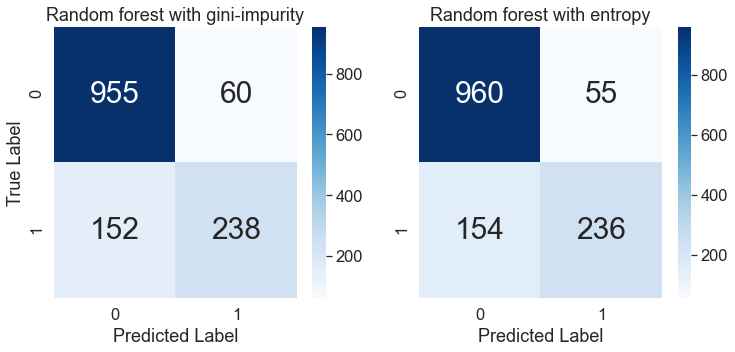

In [168]:
RandomForest = RandomForestClassifier(criterion='gini').fit(X_train_pca, y_train)
# print(RandomForest.score(X_test, y_test))

print(RandomForest.score(X_test_pca, y_test))
Gini_predict = RandomForest.predict(X_test_pca)
print(classification_report(y_test, Gini_predict))
print(confusion_matrix(y_test, Gini_predict))
print('kappa:', cohen_kappa_score(y_test, Gini_predict))

print('ENTROPHY:')
RandomForestEntropy = RandomForestClassifier(criterion='entropy').fit(X_train_pca, y_train)

print(RandomForestEntropy.score(X_test_pca, y_test))
Entropy_predict = RandomForestEntropy.predict(X_test_pca)
print(classification_report(y_test, Entropy_predict))
print(confusion_matrix(y_test, Entropy_predict))
print('kappa:', cohen_kappa_score(y_test, Entropy_predict))

#generating confusion matrix
plt.rcParams["figure.figsize"] = (12, 5)
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, Gini_predict), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Random forest with gini-impurity')
plt.xlabel("Predicted Label")
plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, Entropy_predict), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Random forest with entropy')


plt.savefig('forest_gini_e_conf_matixPCA.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


Acc - Gini
0.8199288256227758
0.7544483985765125
0.5404905794525419
0.4482827305580058
Acc - Entropy
0.8128113879003559
0.7615658362989324
0.5253957550653438
0.46274576948320645


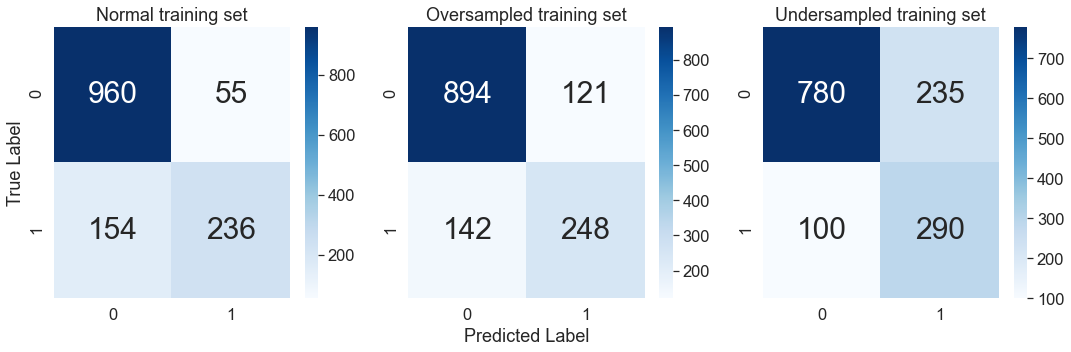

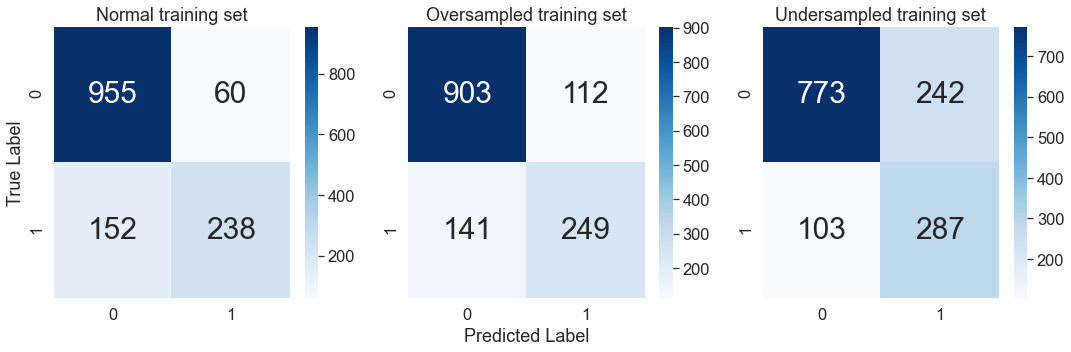

In [169]:
# Over-under sampling 
# Gini
forest_over = DecisionTreeClassifier().fit(X_pca_over, y_over)
forest_under = DecisionTreeClassifier().fit(X_pca_under, y_under)

print('Acc - Gini')
print(forest_over.score(X_test_pca, y_test))
print(forest_under.score(X_test_pca, y_test))

forest_over_pred = forest_over.predict(X_test_pca)
forest_under_pred = forest_under.predict(X_test_pca)

print(cohen_kappa_score(y_test, forest_over_pred))
print(cohen_kappa_score(y_test, forest_under_pred))

# entropy
forest_over_e = DecisionTreeClassifier(criterion='entropy').fit(X_pca_over, y_over)
forest_under_e = DecisionTreeClassifier(criterion='entropy').fit(X_pca_under, y_under)

print('Acc - Entropy')
print(forest_over_e.score(X_test_pca, y_test))
print(forest_under_e.score(X_test_pca, y_test))

forest_over_pred_e = forest_over_e.predict(X_test_pca)
forest_under_pred_e = forest_under_e.predict(X_test_pca)

print(cohen_kappa_score(y_test, forest_over_pred_e))
print(cohen_kappa_score(y_test, forest_under_pred_e))



#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, Entropy_predict), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, forest_over_pred_e), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, forest_under_pred_e), annot=True, cmap='Blues', fmt='g')
plt.title('Undersampled training set')


plt.savefig('forest_conf_matixPCA.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, Gini_predict), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, forest_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, forest_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Undersampled training set')


plt.savefig('gini_forest_conf_matixPCA.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)

### 4.2 MDS


0.9117437722419929
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1015
           1       0.90      0.77      0.83       390

    accuracy                           0.91      1405
   macro avg       0.91      0.87      0.88      1405
weighted avg       0.91      0.91      0.91      1405

[[982  33]
 [ 91 299]]
kappa: 0.7693824872592494
ENTROPHY:
0.9074733096085409
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1015
           1       0.90      0.75      0.82       390

    accuracy                           0.91      1405
   macro avg       0.90      0.86      0.88      1405
weighted avg       0.91      0.91      0.90      1405

[[982  33]
 [ 97 293]]
kappa: 0.7570174271650925


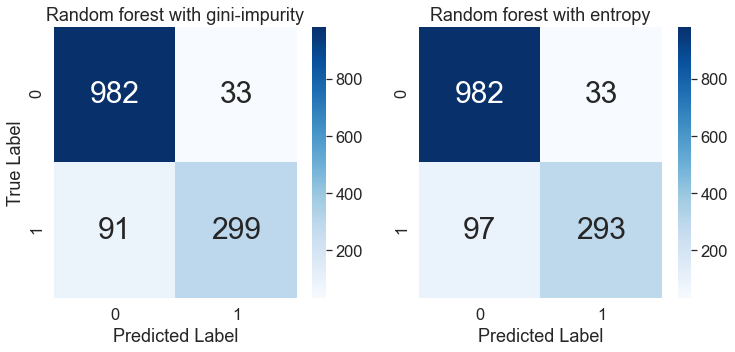

In [170]:
RandomForest = RandomForestClassifier(criterion='gini').fit(X_train_mds, y_train)
# print(RandomForest.score(X_test, y_test))

print(RandomForest.score(X_test_mds, y_test))
Gini_predict = RandomForest.predict(X_test_mds)
print(classification_report(y_test, Gini_predict))
print(confusion_matrix(y_test, Gini_predict))
print('kappa:', cohen_kappa_score(y_test, Gini_predict))

print('ENTROPHY:')
RandomForestEntropy = RandomForestClassifier(criterion='entropy').fit(X_train_mds, y_train)

print(RandomForestEntropy.score(X_test_mds, y_test))
Entropy_predict = RandomForestEntropy.predict(X_test_mds)
print(classification_report(y_test, Entropy_predict))
print(confusion_matrix(y_test, Entropy_predict))
print('kappa:', cohen_kappa_score(y_test, Entropy_predict))

#generating confusion matrix
plt.rcParams["figure.figsize"] = (12, 5)
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, Gini_predict), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Random forest with gini-impurity')
plt.xlabel("Predicted Label")
plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, Entropy_predict), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Random forest with entropy')


plt.savefig('forest_gini_e_conf_matixMDS.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


Acc - Gini
0.8875444839857651
0.8491103202846975
0.7151052361396304
0.6476905789816074
Acc - Entropy
0.8846975088967971
0.8491103202846975
0.7069524913093859
0.6482107003661273


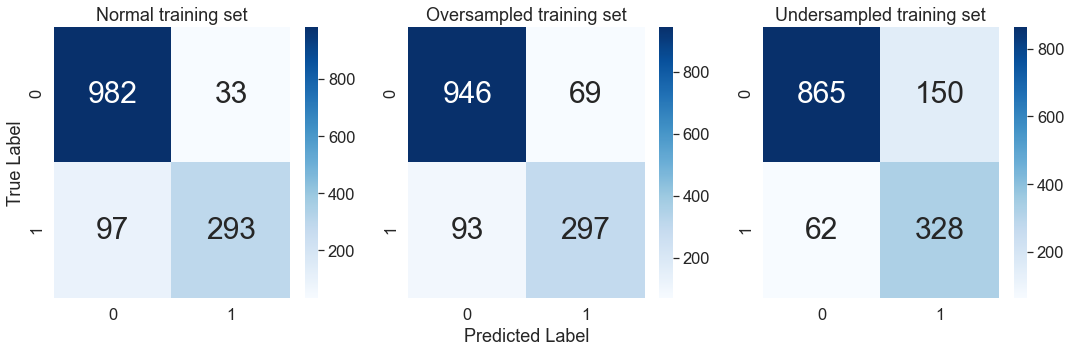

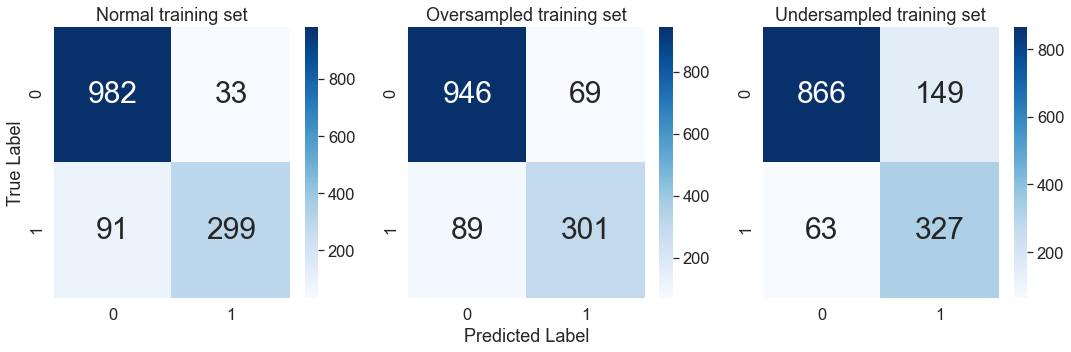

In [171]:
# Over-under sampling 
# Gini
forest_over = DecisionTreeClassifier().fit(X_mds_over, y_over)
forest_under = DecisionTreeClassifier().fit(X_mds_under, y_under)

print('Acc - Gini')
print(forest_over.score(X_test_mds, y_test))
print(forest_under.score(X_test_mds, y_test))

forest_over_pred = forest_over.predict(X_test_mds)
forest_under_pred = forest_under.predict(X_test_mds)

print(cohen_kappa_score(y_test, forest_over_pred))
print(cohen_kappa_score(y_test, forest_under_pred))

# entropy
forest_over_e = DecisionTreeClassifier(criterion='entropy').fit(X_mds_over, y_over)
forest_under_e = DecisionTreeClassifier(criterion='entropy').fit(X_mds_under, y_under)

print('Acc - Entropy')
print(forest_over_e.score(X_test_mds, y_test))
print(forest_under_e.score(X_test_mds, y_test))

forest_over_pred_e = forest_over_e.predict(X_test_mds)
forest_under_pred_e = forest_under_e.predict(X_test_mds)

print(cohen_kappa_score(y_test, forest_over_pred_e))
print(cohen_kappa_score(y_test, forest_under_pred_e))



#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, Entropy_predict), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, forest_over_pred_e), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, forest_under_pred_e), annot=True, cmap='Blues', fmt='g')
plt.title('Undersampled training set')


plt.savefig('forest_conf_matixMDS.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)


#generating confusion matrix
plt.rcParams["figure.figsize"] = (18, 5)
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, Gini_predict), annot=True, cmap='Blues', fmt='g')
plt.ylabel("True Label")
plt.title('Normal training set')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, forest_over_pred), annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.title('Oversampled training set')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, forest_under_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Undersampled training set')


plt.savefig('gini_forest_conf_matixMDS.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)